In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
# load matlab file 
mat = loadmat('data/ex3data1.mat')

In [3]:
X = mat["X"]
y = mat["y"]

In [4]:
X.shape

(5000, 400)

according to X.shape (5000,400) corresponds to 5000 training examples each with 400 featuers from its 20x20 pixel.

# Visualizing Data

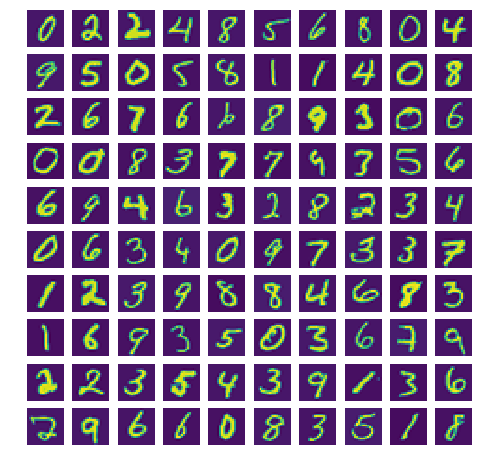

In [5]:
import matplotlib.image as mpimg
fig,axis = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
        img = X[np.random.randint(0,5001),:].reshape((20,20),order='F')
        axis[i,j].imshow(img)
        axis[i,j].axis('off')

# Compute cost function and Gradient Descent

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [7]:
def getCost(X,y,theta,Lambda):
    m = len(y)
    equation_metrix = np.dot(X,theta)
    predictions = sigmoid(equation_metrix)
    error = (-y*np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = sum(error)*1/m
    regularizedCost = cost + Lambda/(2*m)*sum(theta[1:]**2)
    
    #gradient exactly same to the linear regression,but hypothesis is different
    j_0 = 1/m* np.dot(X.T,(predictions-y))[0]
    j_1 = 1/m* np.dot(X.T,(predictions-y))[1:] + (Lambda/m)*theta[1:]
    gradient = np.vstack((j_0[:,np.newaxis],j_1))
    return regularizedCost,gradient

# Optimizing G.D

In [8]:
history=[]
def gradientDescent(X,y,theta,learning_rate,num_iterations,Lambda):
    m = len(y)
    for i in range(num_iterations):
        cost,grad = getCost(X,y,theta,Lambda)
        theta = theta - (learning_rate*grad)
        history.append(cost[0])
    return theta,history

# One vs All
ONEVSALL trains multiple logistic regression classifiers

In [19]:
all_thetas = []
all_cost_history = []
def onevsall(X,y,num_labels,Lambda):
    m,n = X.shape[0],X.shape[1],
    init_theta = np.zeros((n+1,1))
    X = np.hstack((np.ones((m,1)),X))

    #loop over lables
    for i in range(1,num_labels+1):
        thetas,cost_history = gradientDescent(X,np.where(y==i,1,0),init_theta,1,300,Lambda)
        all_thetas.extend(thetas)
        all_cost_history.extend(cost_history)
    return all_thetas,all_cost_history

In [20]:
all_thetas = []
all_cost_history = []
history=[]

In [21]:
results = onevsall(X,y,10,3)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

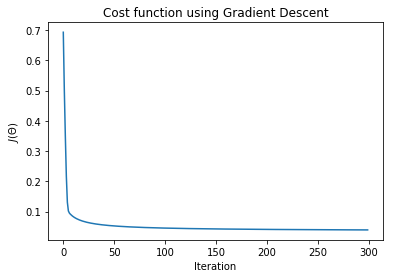

In [23]:
plt.plot(results[1][0:300])
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")